In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("data\BankChurners.csv")

In [3]:
len(df.columns)

23

In [4]:
df.drop(df.columns[21:23], axis=1, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.describe(include=[object])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [6]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtypes == 'O':
        categorical.append(col)
    else:
        numerical.append(col)
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [9]:
# for cat in categorical:
#     plt.figure(figsize=(20,5))
#     ax = sns.countplot(df[cat], palette = 'rainbow')
#     plt.show()

In [10]:
from sklearn.model_selection import train_test_split
import random

np.random.seed(42)

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
y_test

3781    Existing Customer
2922    Existing Customer
5070    Existing Customer
7246    Existing Customer
623     Existing Customer
              ...        
1937    Existing Customer
4705    Attrited Customer
8548    Existing Customer
1346    Existing Customer
8802    Existing Customer
Name: Attrition_Flag, Length: 2026, dtype: object

In [12]:
df.loc[df['Attrition_Flag'] == "Attrited Customer",["Attrition_Flag"]] = 0
df.loc[df['Attrition_Flag'] == "Existing Customer",["Attrition_Flag"]] = 1
df.loc[df['Gender'] == "M",["Gender"]] = 0
df.loc[df['Gender'] == "F",["Gender"]] = 1

In [13]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,0,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,1,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<AxesSubplot:ylabel='Count'>

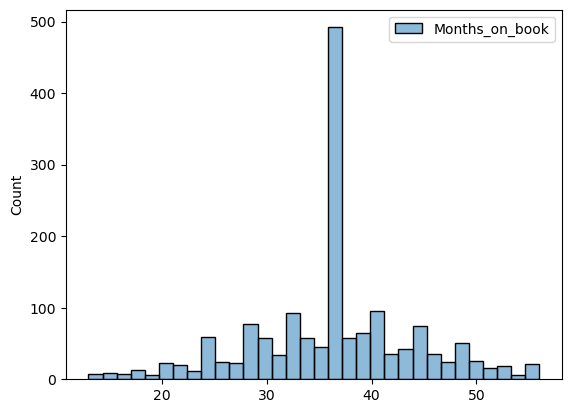

In [14]:
sns.histplot(df.loc[df['Attrition_Flag'] == 0,['Months_on_book']])

In [15]:
df.loc[df['Attrition_Flag'] == 0,['Months_on_book']].max()

Months_on_book    56
dtype: int64

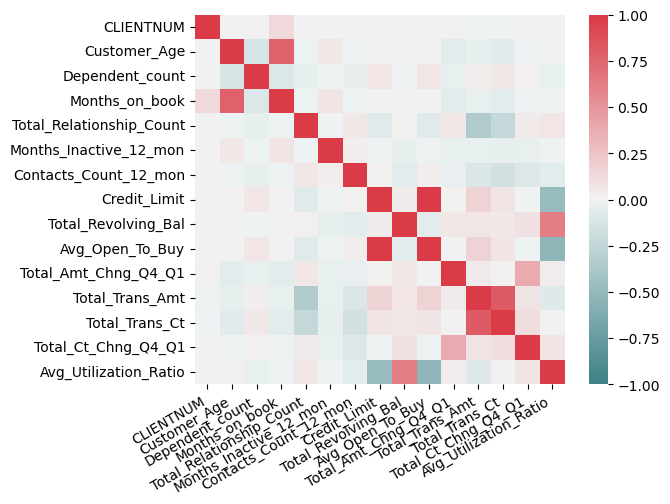

In [28]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

C:\Users\rsupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

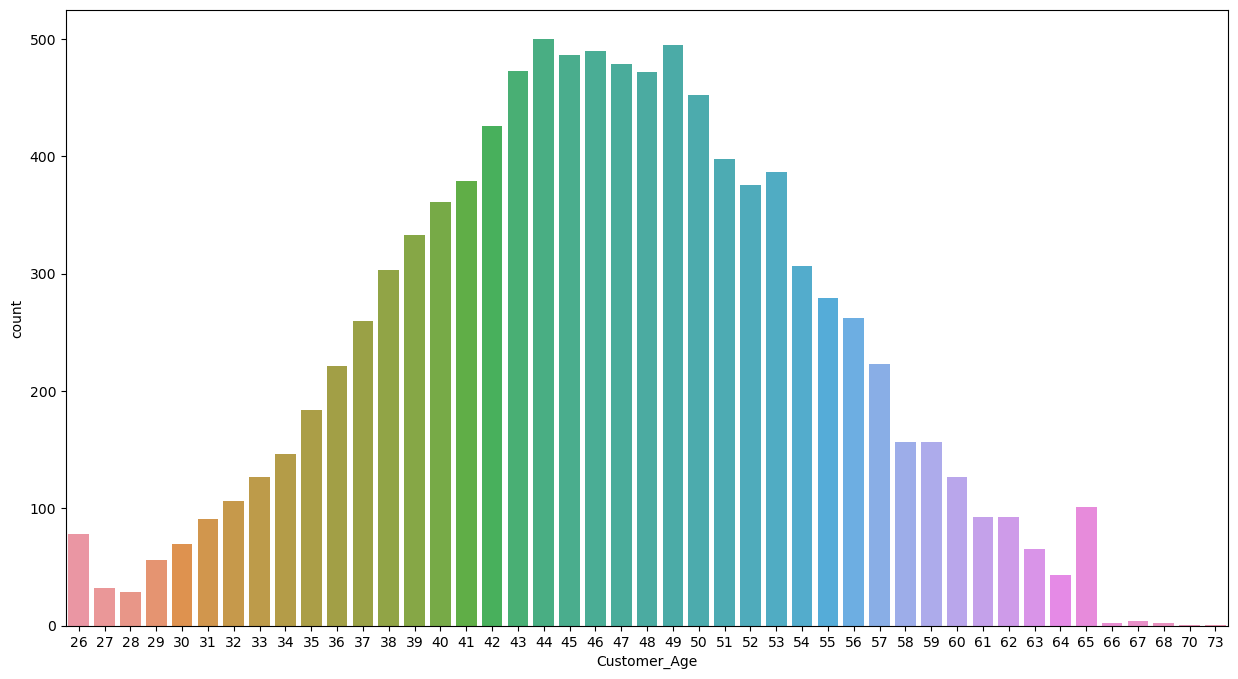

In [17]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8
sns.countplot(df['Customer_Age'])

In [18]:
df[["Attrition_Flag"]] = df[["Attrition_Flag"]].astype(int)
df[['Gender']] = df[['Gender']].astype(int)

df[['Credit_Limit']] = df[['Credit_Limit']].astype(int)
df[['Avg_Open_To_Buy']] = df[['Avg_Open_To_Buy']].astype(int)
df[['Total_Amt_Chng_Q4_Q1']] = df[['Total_Amt_Chng_Q4_Q1']].astype(int)
df[['Total_Ct_Chng_Q4_Q1']] = df[['Total_Ct_Chng_Q4_Q1']].astype(int)
df[['Avg_Utilization_Ratio']] = df[['Avg_Utilization_Ratio']].astype(int)

In [19]:
categorical[2:]

['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [20]:
df_new = pd.get_dummies(df, columns=categorical[2:])

In [21]:
df_new.dtypes

CLIENTNUM                         int64
Attrition_Flag                    int32
Customer_Age                      int64
Gender                            int32
Dependent_count                   int64
Months_on_book                    int64
Total_Relationship_Count          int64
Months_Inactive_12_mon            int64
Contacts_Count_12_mon             int64
Credit_Limit                      int32
Total_Revolving_Bal               int64
Avg_Open_To_Buy                   int32
Total_Amt_Chng_Q4_Q1              int32
Total_Trans_Amt                   int64
Total_Trans_Ct                    int64
Total_Ct_Chng_Q4_Q1               int32
Avg_Utilization_Ratio             int32
Education_Level_College           uint8
Education_Level_Doctorate         uint8
Education_Level_Graduate          uint8
Education_Level_High School       uint8
Education_Level_Post-Graduate     uint8
Education_Level_Uneducated        uint8
Education_Level_Unknown           uint8
Marital_Status_Divorced           uint8
